<a href="https://colab.research.google.com/github/Samxiar/ML/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [17]:
df = pd.read_csv('sussybaka.csv')
df.head()

,Name,Age,Income
0,rob,27,70000
1,michael,29,90000
2,mohan,28,61000
3,ismail,42,60000
4,kory,39,150000


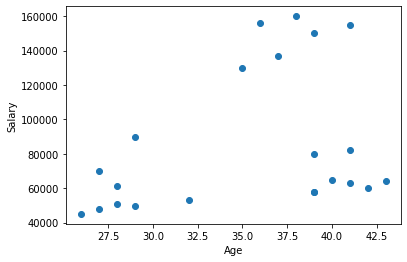

In [25]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df.Age,df['Income'])


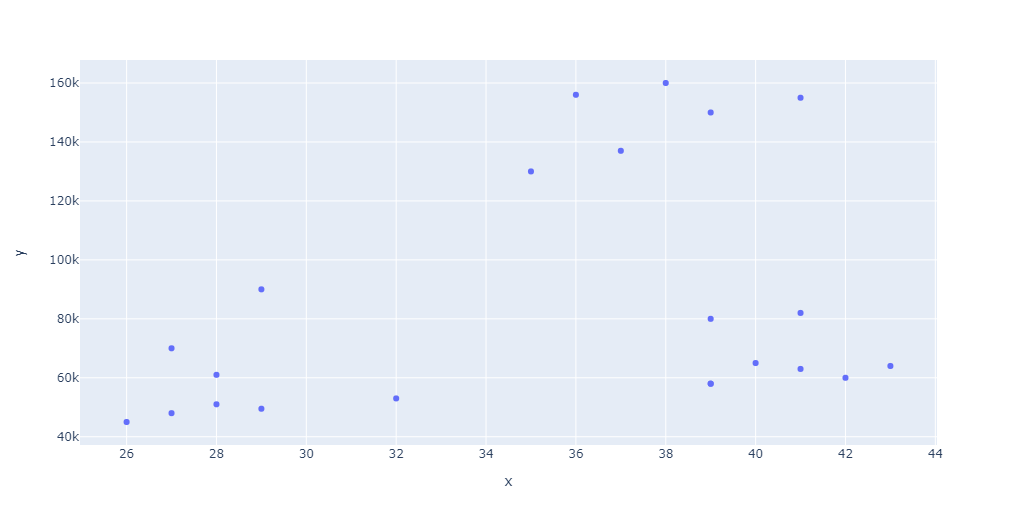

In [29]:
km = KMeans(n_clusters=3)
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [32]:
y_predict = km.fit_predict(df[['Age','Income']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0],
      dtype=int32)

In [41]:
df['Cluster']=y_predict
df.head()

,Name,Age,Income,Cluster
0,rob,27,70000,2
1,michael,29,90000,2
2,mohan,28,61000,0
3,ismail,42,60000,0
4,kory,39,150000,1


Text(0, 0.5, 'Age')

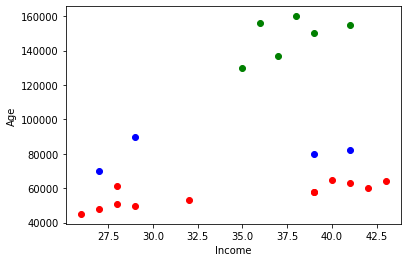

In [46]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='green')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.xlabel('Income')
plt.ylabel('Age')

In [55]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df[['Income']] = scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df

,Name,Age,Income,Cluster
0,rob,0.058824,0.217391,2
1,michael,0.176471,0.391304,2
2,mohan,0.117647,0.139130,0
3,ismail,0.941176,0.130435,0
4,kory,0.764706,0.913043,1
5,gautam,0.882353,0.956522,1
6,david,0.705882,1.000000,1
7,andrea,0.588235,0.965217,1
8,brad,0.529412,0.739130,1
9,angelina,0.647059,0.800000,1


In [58]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income']])
y_predict

array([2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [63]:
df.drop('Cluster',axis = 'columns',inplace =True)
df['Cluster']=y_predict
df

,Name,Age,Income,Cluster
0,rob,0.058824,0.217391,2
1,michael,0.176471,0.391304,2
2,mohan,0.117647,0.139130,2
3,ismail,0.941176,0.130435,1
4,kory,0.764706,0.913043,0
5,gautam,0.882353,0.956522,0
6,david,0.705882,1.000000,0
7,andrea,0.588235,0.965217,0
8,brad,0.529412,0.739130,0
9,angelina,0.647059,0.800000,0


Text(0, 0.5, 'Age')

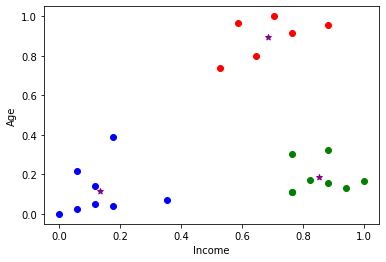

In [68]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='green')
plt.scatter(df3.Age,df3['Income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='*')

plt.xlabel('Income')
plt.ylabel('Age')

In [66]:
# Centroids
km.cluster_centers_

array([[0.68627451, 0.89565217],
       [0.85294118, 0.18478261],
       [0.13235294, 0.11684783]])

In [89]:
krange = range(1,10)
sse = []
for k in krange:
  km = KMeans(n_clusters = k)
  km.fit(df[['Age','Income']])
  sse.append(km.inertia_)

In [90]:
sse

[5.1185976882792374,
 2.2664976412559907,
 0.43868055600979416,
 0.3443538547410514,
 0.26445310404824673,
 0.21827736387560698,
 0.16984712510601926,
 0.12481223086365648,
 0.09722760949147813]

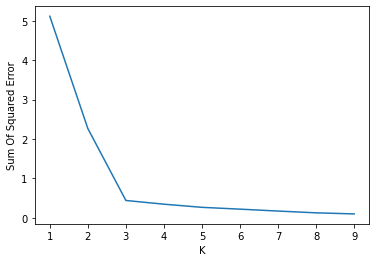

In [91]:
plt.xlabel('K')
plt.ylabel('Sum Of Squared Error')
plt.plot(krange,sse)